In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('OnlineRetail.csv')
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
TotalPrice     541909 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [5]:
df = df[pd.notnull(df['CustomerID'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
TotalPrice     406829 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null float64
Country        397884 non-null object
TotalPrice     397884 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [8]:
df['CustomerID'] = df['CustomerID'].astype(np.int32)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [9]:
df.to_csv('FilteredOnlineRetail.csv')

### Selecting VIP clients
- based on number of transactions
- based on accumulated payments

In [10]:
vip_by_transactions = df.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)
vip_by_transactions


CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
15823       1
15802       1
15753       1
15668       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [11]:
df.groupby('CustomerID').sum()['TotalPrice'].sort_values(ascending=False)


CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: TotalPrice, Length: 4338, dtype: float64

### user retention analysis
- based on monthly user cohort, analyze rate of monthly repurchase
- use of hitmap

In [12]:
from IPython.display import Image #source: https://analyticsmarketing.co.kr/digital-analytics/google-analytics/1527/
Image(url='http://analyticsmarketing.co.kr/wp-content/uploads/2017/08/구글애널리틱스_코호트_01.png')

#### find the month of first purchase
- month: purchase month
- first_month_of_purchase: the first purchased month from a user

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [14]:
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)
    
df['Month'] = df['InvoiceDate'].apply(get_month_as_datetime)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [15]:
month_group = df.groupby('CustomerID')['Month']
df['First_purchased_month'] = month_group.transform(np.min)

df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,First_purchased_month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


In [16]:
len(df['CustomerID'].unique())

4338

### find the diff between standard month and real actual month

In [17]:
df['Month_diff'] = (df['Month'].dt.year - df['First_purchased_month'].dt.year) * 12 + \
    (df['Month'].dt.month - df['First_purchased_month'].dt.month)

In [18]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,First_purchased_month,Month_diff
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


### Count clients based on the standard month and monthpassed 

In [19]:
def get_unique_ID(x): 
    return len(np.unique(x))

cohort_group = df.groupby(['First_purchased_month', 'Month_diff'])
cohort_df = cohort_group['CustomerID'].apply(get_unique_ID).reset_index()
cohort_df.head()

,First_purchased_month,Month_diff,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [20]:
#change month_diff column into raw
cohort_df = cohort_df.pivot(index='First_purchased_month', columns='Month_diff')
cohort_df.head()


CustomerID                                            \
Month_diff                    0      1      2      3      4      5      6    
First_purchased_month                                                        
2010-12-01                 885.0  324.0  286.0  340.0  321.0  352.0  321.0   
2011-01-01                 417.0   92.0  111.0   96.0  134.0  120.0  103.0   
2011-02-01                 380.0   71.0   71.0  108.0  103.0   94.0   96.0   
2011-03-01                 452.0   68.0  114.0   90.0  101.0   76.0  121.0   
2011-04-01                 300.0   64.0   61.0   63.0   59.0   68.0   65.0   

                                                                 
Month_diff                7      8      9      10     11     12  
First_purchased_month                                            
2010-12-01             309.0  313.0  350.0  331.0  445.0  235.0  
2011-01-01             101.0  125.0  136.0  152.0   49.0    NaN  
2011-02-01             106.0   94.0  116.0   26.0    NaN    NaN  
2011-03-01             104.0  126.0   39.0    NaN    NaN    NaN  
2011-04-01              78.0   22.0    NaN    NaN    NaN    NaN

In [21]:
customer_cohort = cohort_df.div(cohort_df.iloc[:,0], axis=0) * 100
customer_cohort = customer_cohort.round(decimals=2)

customer_cohort

CustomerID                                            \
Month_diff                    0      1      2      3      4      5      6    
First_purchased_month                                                        
2010-12-01                 100.0  36.61  32.32  38.42  36.27  39.77  36.27   
2011-01-01                 100.0  22.06  26.62  23.02  32.13  28.78  24.70   
2011-02-01                 100.0  18.68  18.68  28.42  27.11  24.74  25.26   
2011-03-01                 100.0  15.04  25.22  19.91  22.35  16.81  26.77   
2011-04-01                 100.0  21.33  20.33  21.00  19.67  22.67  21.67   
2011-05-01                 100.0  19.01  17.25  17.25  20.77  23.24  26.41   
2011-06-01                 100.0  17.36  15.70  26.45  23.14  33.47   9.50   
2011-07-01                 100.0  18.09  20.74  22.34  27.13  11.17    NaN   
2011-08-01                 100.0  20.71  24.85  24.26  12.43    NaN    NaN   
2011-09-01                 100.0  23.41  30.10  11.37    NaN    NaN    NaN   
2011-10-01                 100.0  24.02  11.45    NaN    NaN    NaN    NaN   
2011-11-01                 100.0  11.15    NaN    NaN    NaN    NaN    NaN   
2011-12-01                 100.0    NaN    NaN    NaN    NaN    NaN    NaN   

                                                                 
Month_diff                7      8      9      10     11     12  
First_purchased_month                                            
2010-12-01             34.92  35.37  39.55  37.40  50.28  26.55  
2011-01-01             24.22  29.98  32.61  36.45  11.75    NaN  
2011-02-01             27.89  24.74  30.53   6.84    NaN    NaN  
2011-03-01             23.01  27.88   8.63    NaN    NaN    NaN  
2011-04-01             26.00   7.33    NaN    NaN    NaN    NaN  
2011-05-01              9.51    NaN    NaN    NaN    NaN    NaN  
2011-06-01               NaN    NaN    NaN    NaN    NaN    NaN  
2011-07-01               NaN    NaN    NaN    NaN    NaN    NaN  
2011-08-01               NaN    NaN    NaN    NaN    NaN    NaN  
2011-09-01               NaN    NaN    NaN    NaN    NaN    NaN  
2011-10-01               NaN    NaN    NaN    NaN    NaN    NaN  
2011-11-01               NaN    NaN    NaN    NaN    NaN    NaN  
2011-12-01               NaN    NaN    NaN    NaN    NaN    NaN

### printout heatmap
- using seaborn heatmap visualization

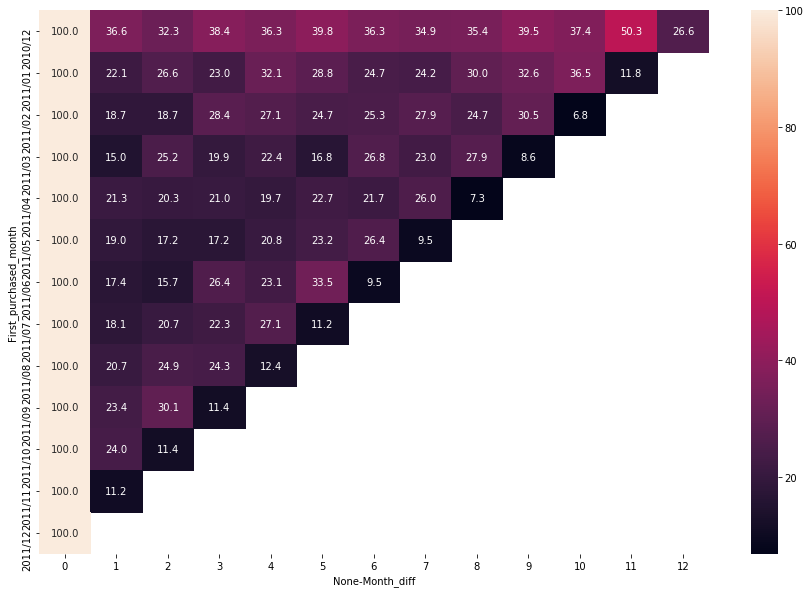

In [22]:
xticks = np.arange(0,13)
yticks = ['2010/12', '2011/01', '2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11', '2011/12']

plt.figure(figsize=(15, 10))
sns.heatmap(customer_cohort,
           annot=True,
           xticklabels=xticks,
           yticklabels=yticks,
           fmt='.1f')